In [1]:
from abel import *
%load_ext autoreload
%autoreload 2

/users/lindstrm/.abelconfig.toml
Loading ABEL config from '/users/lindstrm/.abelconfig.toml'


In [22]:
facet2 = FACET2()
facet2.energy = 10.1e9
facet2.charge = 1.6e-9
facet2.plasma_length = 0.05
facet2.stage_class = StageBasic

In [23]:
facet2.run('facet2_test', overwrite=True)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =   0.0 GeV, Q = -1.60 nC, σz =  30.0 µm, σE =  1.0%, ε =   5.0/5.0 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  900.0 m) :   E =  10.1 GeV, Q = -1.60 nC, σz =  30.0 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
    ... #2  BeamDeliverySystemBasic (s = 1000.0 m) :   E =  10.1 GeV, Q = -1.60 nC, σz =  30.0 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
    ... #3  StageBasic #1           (s = 1000.0 m) :   E =  10.6 GeV, Q = -1.60 nC, σz =  30.0 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
    ... #4  SpectrometerFLASHForwardImpactX (s = 1007.2 m) :   E =  10.6 GeV, Q = -1.60 nC, σz =  30.3 µm, σE =  0.0%, ε =   5.0/5.3 mm-mrad


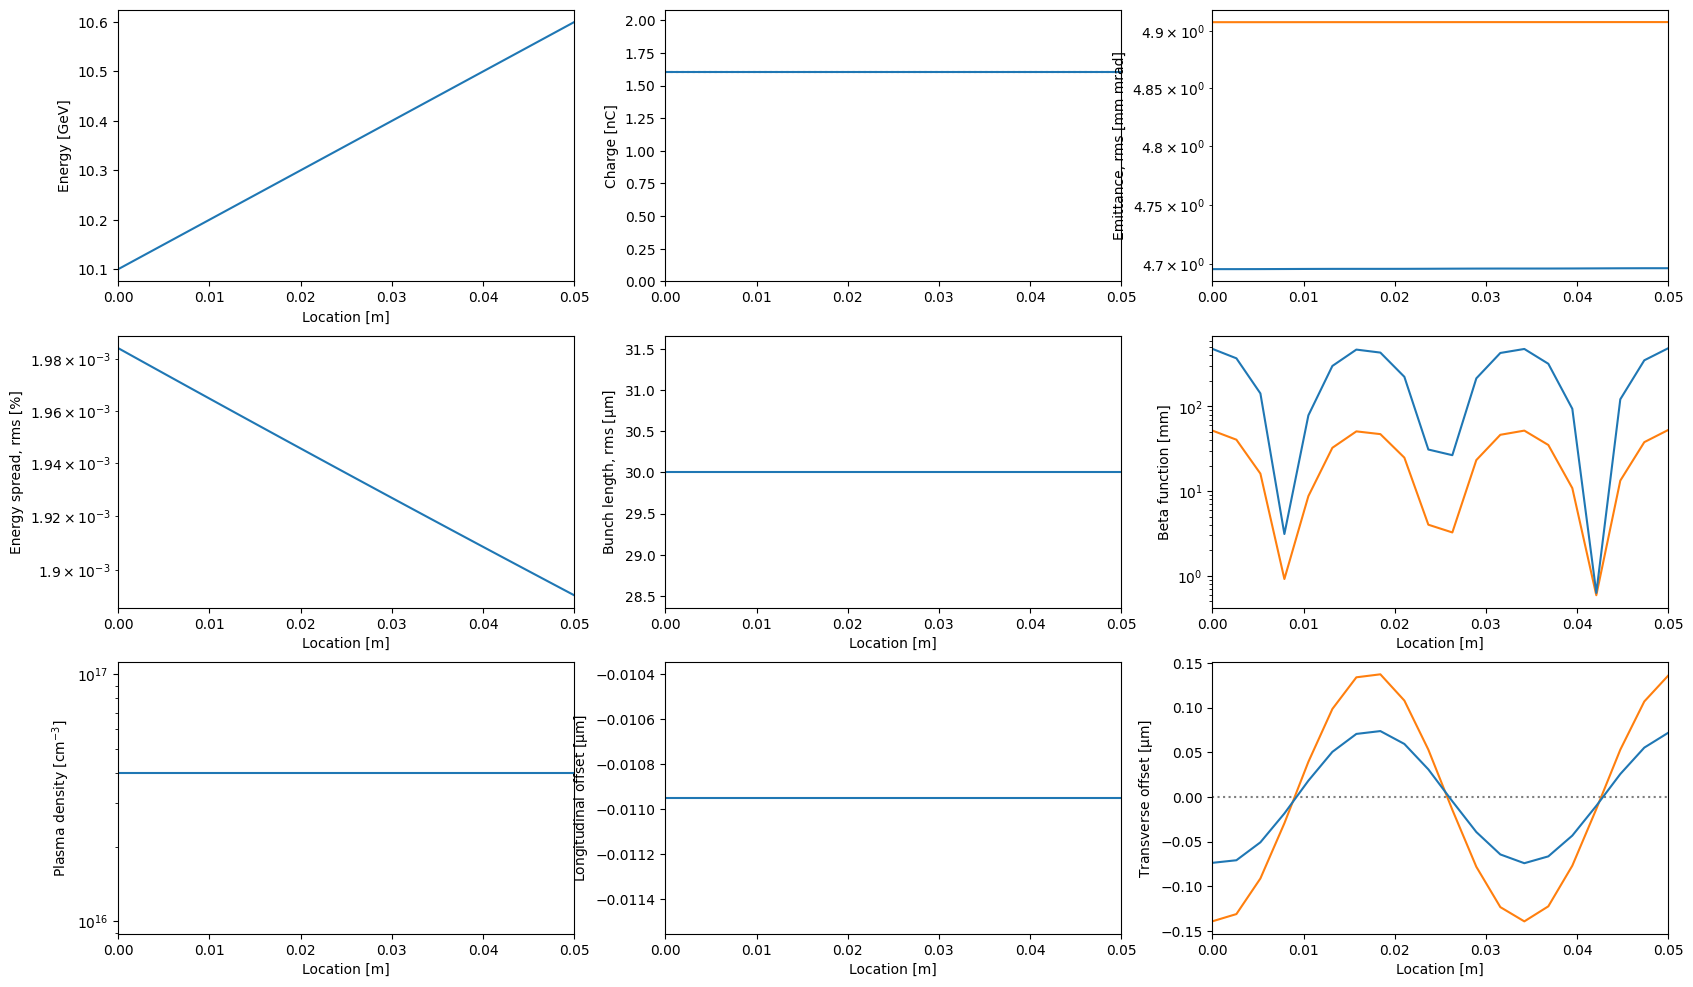

Stage::plot_wake(): No wake calculated.


In [24]:
facet2.stage.plot_evolution()
facet2.stage.plot_wake()

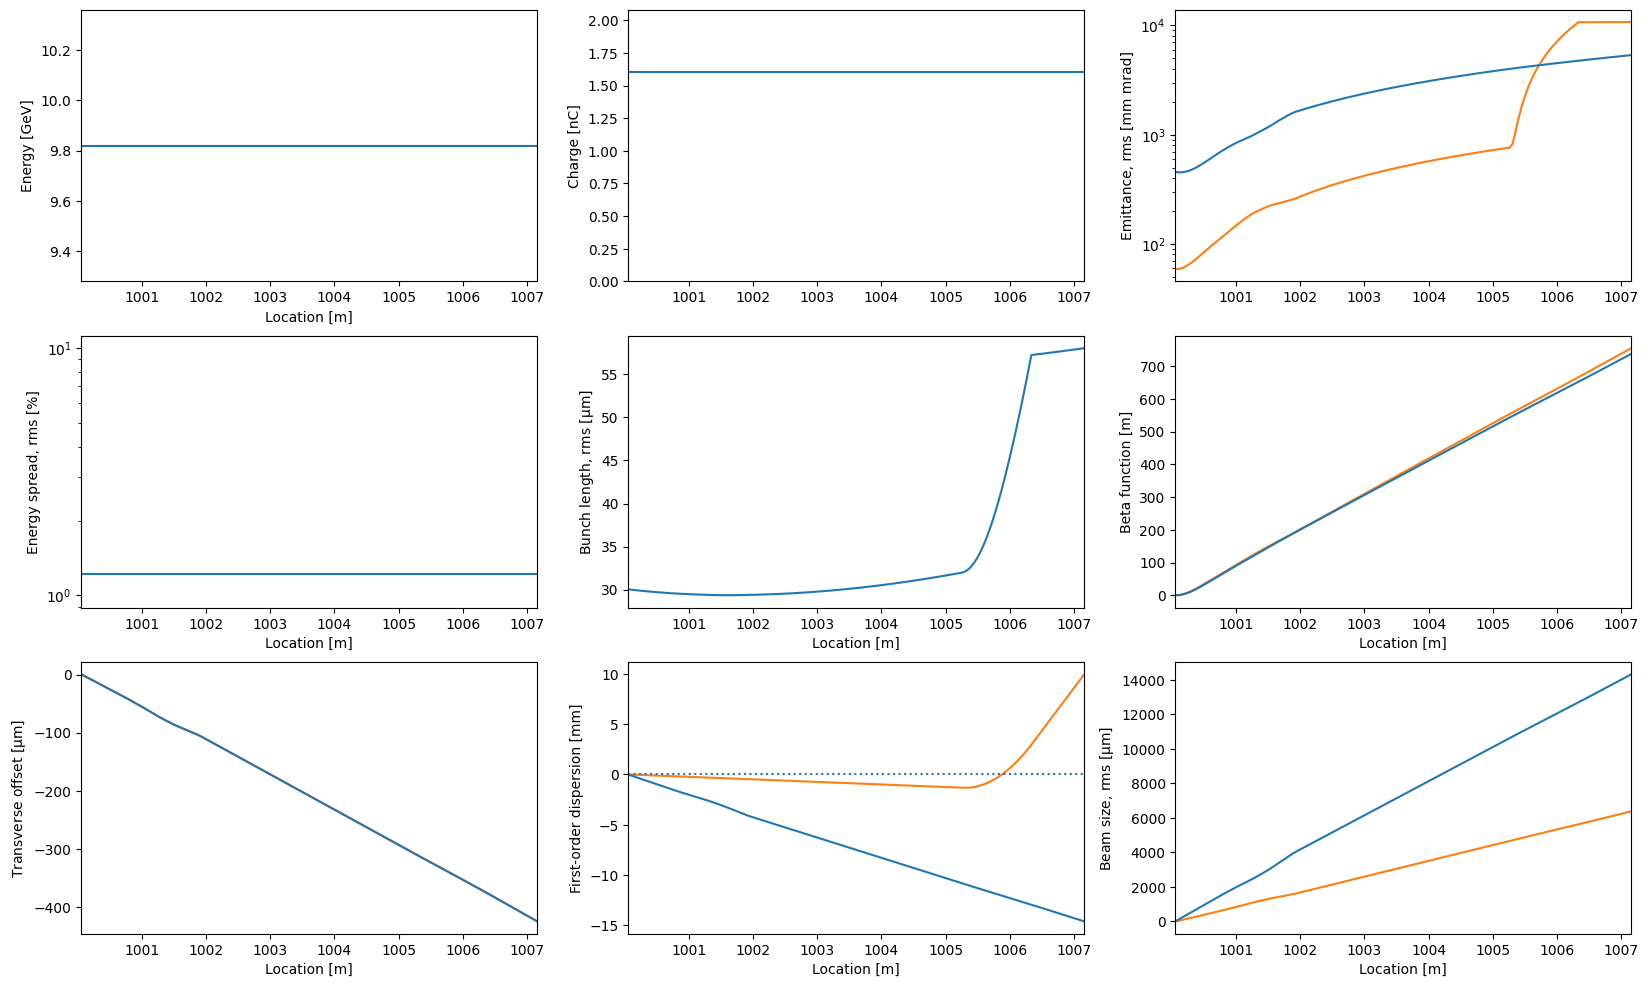

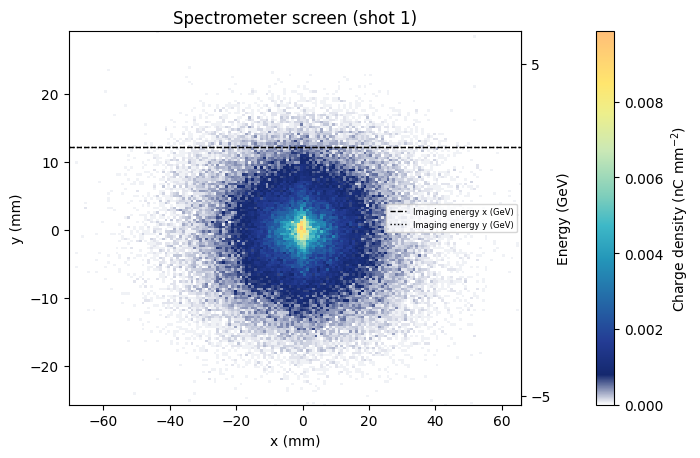

In [17]:
facet2.spectrometer.plot_evolution()
facet2.plot_spectrometer_screen()

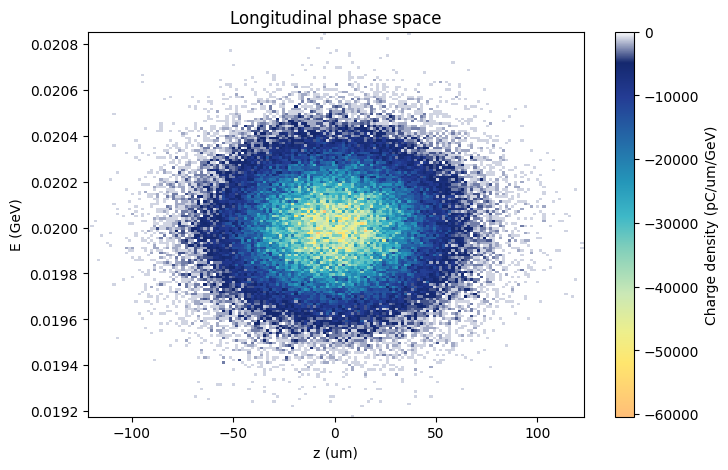

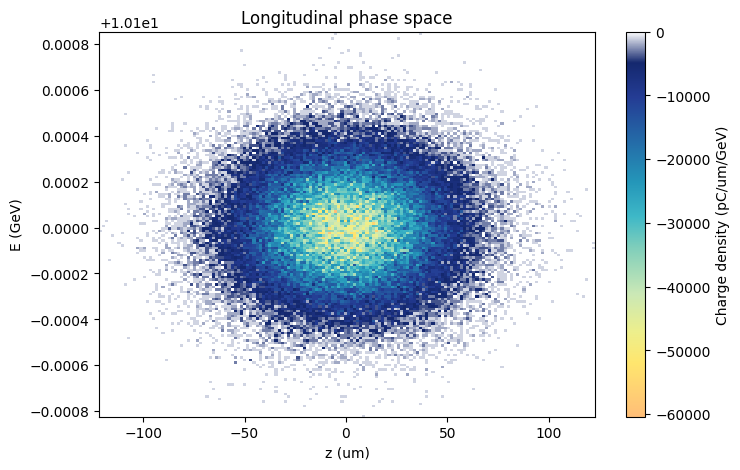

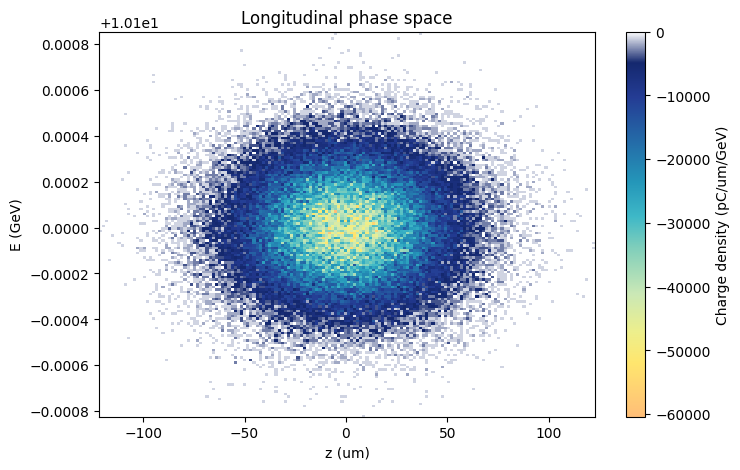

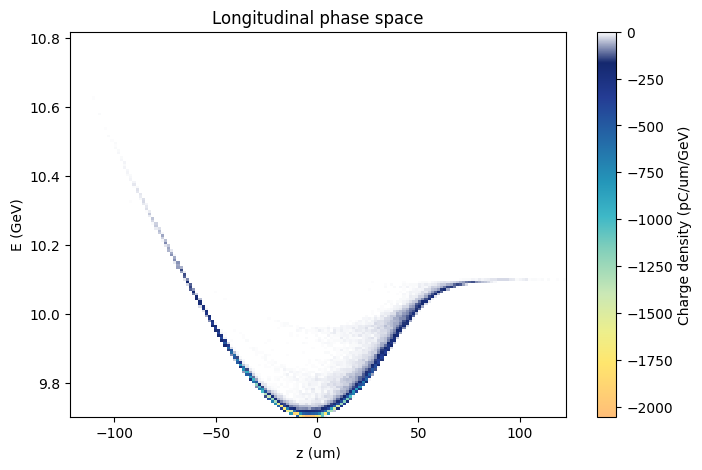

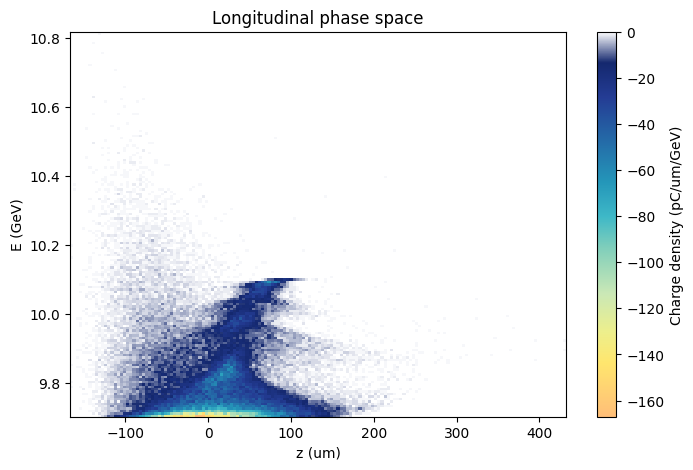

In [20]:
for i in range(facet2.num_outputs()):
    facet2.get_beam(i).plot_lps()

In [ ]:
facet2.scan('facet2_scan_example', 
           lambda obj, val: setattr(obj, 'charge', val) or obj, 
           np.logspace(np.log10(1e-12), np.log10(10e-9), 16),
           label='Charge (nC)',
           scale=1e-9,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=True)